In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# Getting required Haar Cascade algorithms from GitHub
# 1) Frontal face detection
# 2) Eye detection
# 3) Smile detection
# 4) Number plate detection

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-09-19 17:43:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2023-09-19 17:43:25 (16.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [4]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2023-09-19 17:43:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.05s   

2023-09-19 17:43:25 (7.22 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]



In [5]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml

--2023-09-19 17:43:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188506 (184K) [text/plain]
Saving to: ‘haarcascade_smile.xml’

haarcascade_smile.x 100%[===================>] 184.09K  --.-KB/s    in 0.03s   

2023-09-19 17:43:25 (6.19 MB/s) - ‘haarcascade_smile.xml’ saved [188506/188506]



In [6]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml

--2023-09-19 17:43:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75482 (74K) [text/plain]
Saving to: ‘haarcascade_russian_plate_number.xml’

haarcascade_russian 100%[===================>]  73.71K  --.-KB/s    in 0.01s   

2023-09-19 17:43:25 (5.34 MB/s) - ‘haarcascade_russian_plate_number.xml’ saved [75482/75482]



In [7]:
# Downloading the required images

In [8]:
!wget https://image.cnbcfm.com/api/v1/image/107121754-1663727529476-gettyimages-1344872631-pi-2259560.jpeg -O p1.jpg

--2023-09-19 17:43:25--  https://image.cnbcfm.com/api/v1/image/107121754-1663727529476-gettyimages-1344872631-pi-2259560.jpeg
Resolving image.cnbcfm.com (image.cnbcfm.com)... 23.62.112.152
Connecting to image.cnbcfm.com (image.cnbcfm.com)|23.62.112.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282392 (276K) [image/jpeg]
Saving to: ‘p1.jpg’

p1.jpg              100%[===================>] 275.77K  --.-KB/s    in 0.1s    

2023-09-19 17:43:26 (2.71 MB/s) - ‘p1.jpg’ saved [282392/282392]



In [9]:
img1=cv2.imread("/content/p1.jpg")
cv2_imshow(img1)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
!wget https://diabetesneeds.co.uk/wp-content/uploads/2014/11/rsz_young_peoples_needs.jpg -O p2.jpg

--2023-09-19 17:43:27--  https://diabetesneeds.co.uk/wp-content/uploads/2014/11/rsz_young_peoples_needs.jpg
Resolving diabetesneeds.co.uk (diabetesneeds.co.uk)... 64.34.156.156
Connecting to diabetesneeds.co.uk (diabetesneeds.co.uk)|64.34.156.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415411 (1.3M) [image/jpeg]
Saving to: ‘p2.jpg’

p2.jpg              100%[===================>]   1.35M  6.28MB/s    in 0.2s    

2023-09-19 17:43:28 (6.28 MB/s) - ‘p2.jpg’ saved [1415411/1415411]



In [11]:
img2=cv2.imread("/content/p2.jpg")
cv2_imshow(img2)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
!wget https://www.southworld.net/wp-content/uploads/2018/03/you-7-mis.jpg -O p3.jpg

--2023-09-19 17:43:34--  https://www.southworld.net/wp-content/uploads/2018/03/you-7-mis.jpg
Resolving www.southworld.net (www.southworld.net)... 104.21.12.174, 172.67.152.215, 2606:4700:3035::ac43:98d7, ...
Connecting to www.southworld.net (www.southworld.net)|104.21.12.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58974 (58K) [image/jpeg]
Saving to: ‘p3.jpg’

p3.jpg              100%[===================>]  57.59K  --.-KB/s    in 0.001s  

2023-09-19 17:43:35 (109 MB/s) - ‘p3.jpg’ saved [58974/58974]



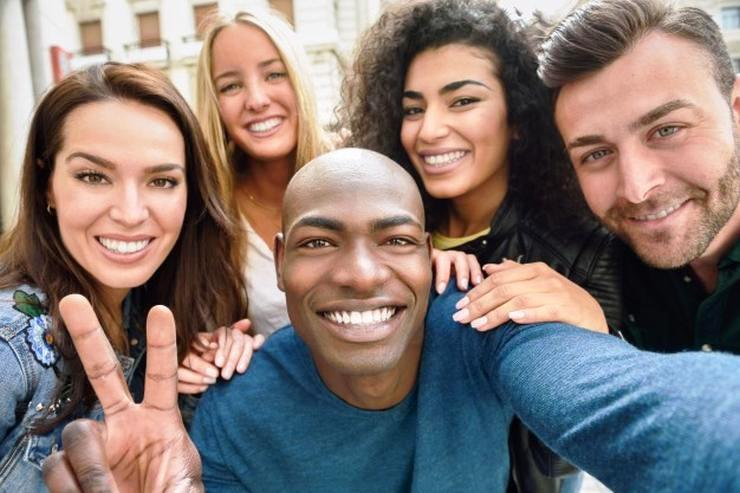

In [13]:
img3=cv2.imread("/content/p3.jpg")
cv2_imshow(img3)

In [14]:
!wget https://www.psypost.org/wp-content/uploads/2021/05/Happy-African-american-man-embracing-his-two-affectionate-girlfriends-polyamory-750x375.jpg -O p4.jpg

--2023-09-19 17:43:35--  https://www.psypost.org/wp-content/uploads/2021/05/Happy-African-american-man-embracing-his-two-affectionate-girlfriends-polyamory-750x375.jpg
Resolving www.psypost.org (www.psypost.org)... 141.193.213.21, 141.193.213.20
Connecting to www.psypost.org (www.psypost.org)|141.193.213.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36854 (36K) [image/jpeg]
Saving to: ‘p4.jpg’

p4.jpg              100%[===================>]  35.99K  --.-KB/s    in 0s      

2023-09-19 17:43:36 (102 MB/s) - ‘p4.jpg’ saved [36854/36854]



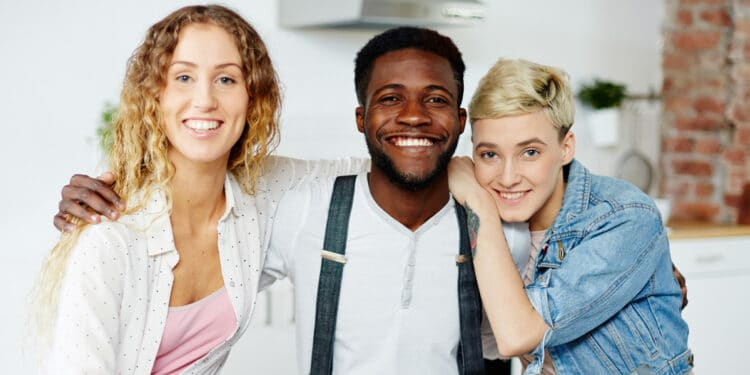

In [15]:
img4=cv2.imread("/content/p4.jpg")
cv2_imshow(img4)

In [16]:
!wget https://cdn.skoda-storyboard.com/2019/04/header-SPZ-RUS-1920x730.jpg -O p5.jpg

--2023-09-19 17:43:36--  https://cdn.skoda-storyboard.com/2019/04/header-SPZ-RUS-1920x730.jpg
Resolving cdn.skoda-storyboard.com (cdn.skoda-storyboard.com)... 13.32.87.65, 13.32.87.129, 13.32.87.18, ...
Connecting to cdn.skoda-storyboard.com (cdn.skoda-storyboard.com)|13.32.87.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317635 (310K) [image/jpeg]
Saving to: ‘p5.jpg’

p5.jpg              100%[===================>] 310.19K   559KB/s    in 0.6s    

2023-09-19 17:43:37 (559 KB/s) - ‘p5.jpg’ saved [317635/317635]



In [17]:
img5=cv2.imread("/content/p5.jpg")
cv2_imshow(img5)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
!wget https://cdn.skoda-storyboard.com/2019/02/License-plate-india-header-1920x730.jpg -O p6.jpg

--2023-09-19 17:43:38--  https://cdn.skoda-storyboard.com/2019/02/License-plate-india-header-1920x730.jpg
Resolving cdn.skoda-storyboard.com (cdn.skoda-storyboard.com)... 13.32.87.65, 13.32.87.129, 13.32.87.18, ...
Connecting to cdn.skoda-storyboard.com (cdn.skoda-storyboard.com)|13.32.87.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172728 (169K) [image/jpeg]
Saving to: ‘p6.jpg’

p6.jpg              100%[===================>] 168.68K   622KB/s    in 0.3s    

2023-09-19 17:43:39 (622 KB/s) - ‘p6.jpg’ saved [172728/172728]



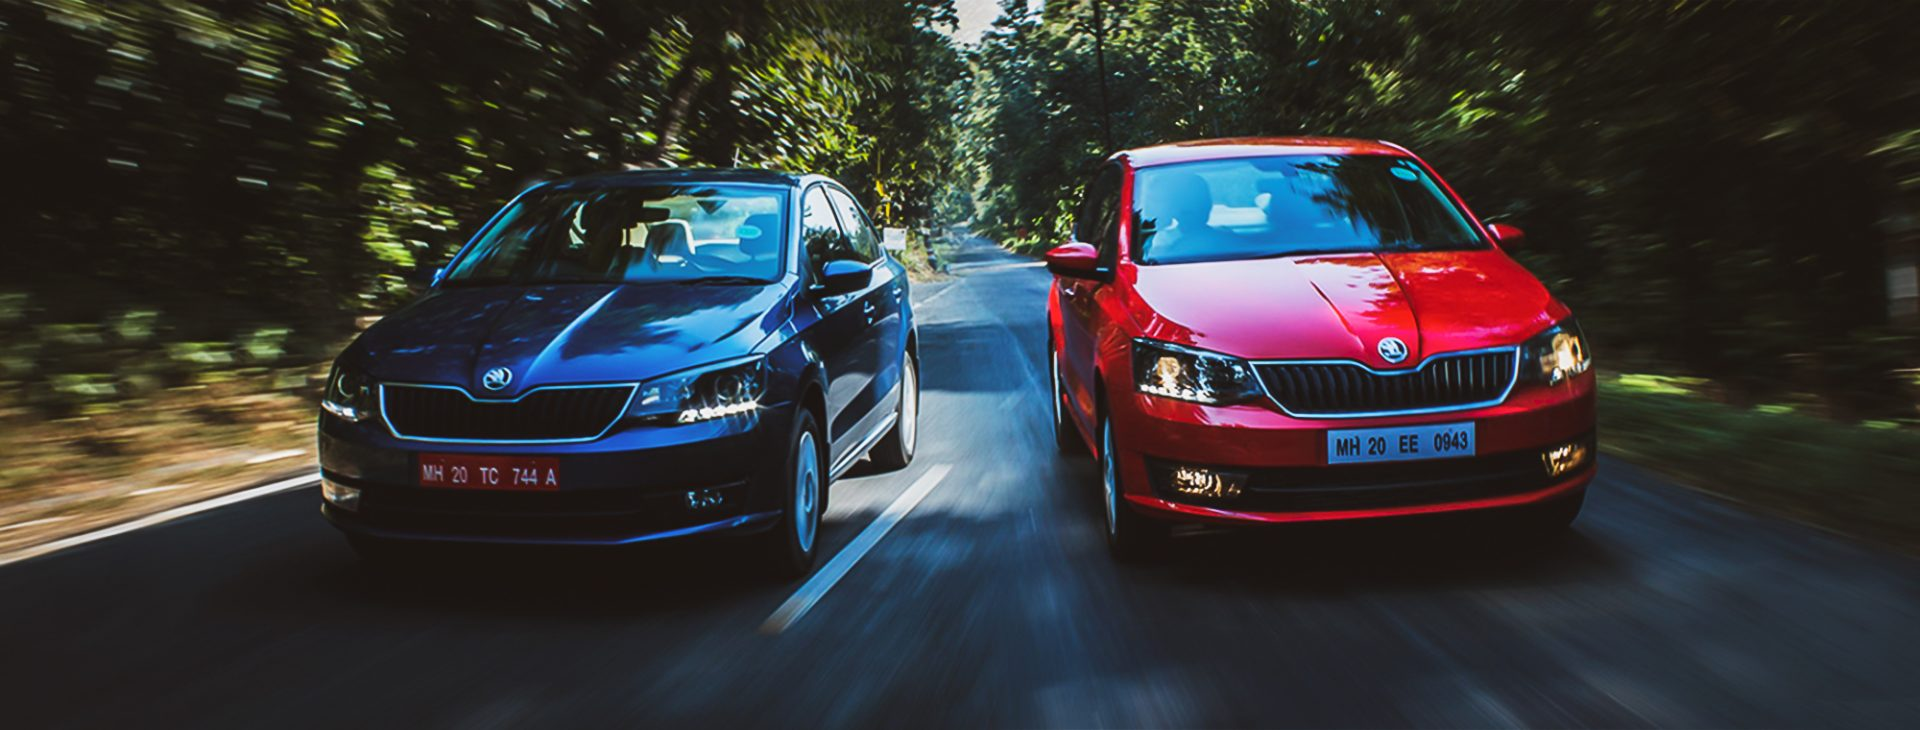

In [19]:
img6=cv2.imread("/content/p6.jpg")
cv2_imshow(img6)

In [20]:
!wget https://i.pinimg.com/736x/5d/07/d2/5d07d2a66993b13c8e8ce37d12fda223--havana-traveling.jpg -O p7.jpg

--2023-09-19 17:43:40--  https://i.pinimg.com/736x/5d/07/d2/5d07d2a66993b13c8e8ce37d12fda223--havana-traveling.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.32.84, 2a04:4e42:45::84
Connecting to i.pinimg.com (i.pinimg.com)|199.232.32.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143066 (140K) [image/jpeg]
Saving to: ‘p7.jpg’

p7.jpg              100%[===================>] 139.71K  --.-KB/s    in 0.03s   

2023-09-19 17:43:40 (5.04 MB/s) - ‘p7.jpg’ saved [143066/143066]



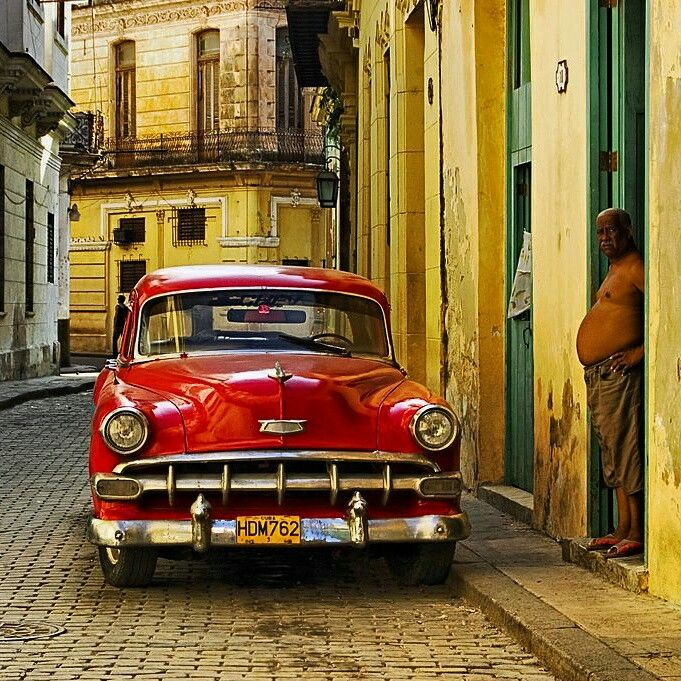

In [21]:
img7=cv2.imread("/content/p7.jpg")
cv2_imshow(img7)

In [22]:
# Storing required models using the function cv2.CascadeClassifier()

In [23]:
face_model=cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_model=cv2.CascadeClassifier("/content/haarcascade_eye.xml")
smile_model=cv2.CascadeClassifier("/content/haarcascade_smile.xml")
num_plate_model=cv2.CascadeClassifier("/content/haarcascade_russian_plate_number.xml")

In [24]:
# Image 1 (Face, smile, eye detection)
img1=cv2.imread("/content/p1.jpg")
face1=face_model.detectMultiScale(img1,1.2,5)
smile1=smile_model.detectMultiScale(img1,1.2,170)
eye1=eye_model.detectMultiScale(img1,1.1,15)


for (x,y,w,h) in face1:
  cv2.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),2)
for (x,y,w,h) in smile1:
  cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
for (x,y,w,h) in eye1:
  cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img1)

In [25]:
# Image 2 (Face, smile, eye detection)
img2=cv2.imread("/content/p2.jpg")
face2=face_model.detectMultiScale(img2,1.2,8)
smile2=smile_model.detectMultiScale(img2,1.3,150)
eye2=eye_model.detectMultiScale(img2,1.2,30)


for (x,y,w,h) in face2:
  cv2.rectangle(img2,(x,y),(x+w,y+h),(0,0,255),4)
for (x,y,w,h) in smile2:
  cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),4)
for (x,y,w,h) in eye2:
  cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),4)

cv2_imshow(img2)

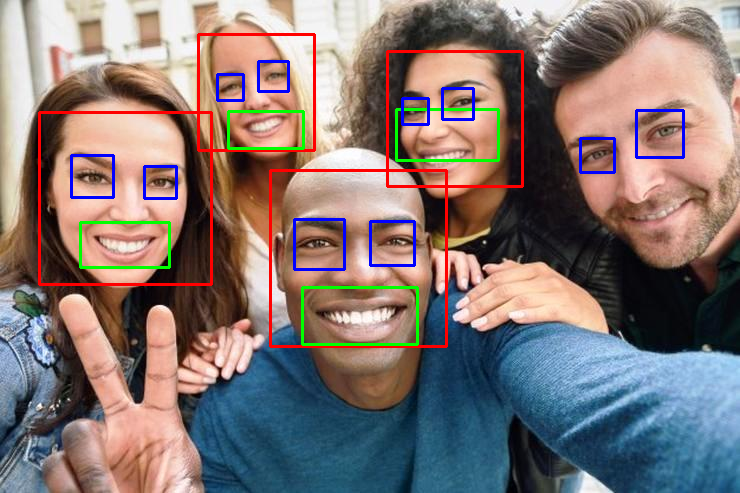

In [26]:
# Image 3 (Face, smile, eye detection)
img3=cv2.imread("/content/p3.jpg")
face3=face_model.detectMultiScale(img3,1.3,2)
smile3=smile_model.detectMultiScale(img3,1.2,70)
eye3=eye_model.detectMultiScale(img3,1.1,15)


for (x,y,w,h) in face3:
  cv2.rectangle(img3,(x,y),(x+w,y+h),(0,0,255),2)
for (x,y,w,h) in smile3:
  cv2.rectangle(img3,(x,y),(x+w,y+h),(0,255,0),2)
for (x,y,w,h) in eye3:
  cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img3)

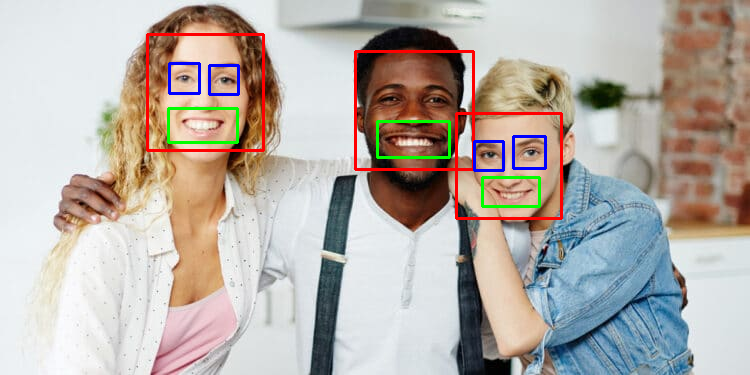

In [27]:
# Image 4 (Face, smile, eye detection)
img4=cv2.imread("/content/p4.jpg")
face4=face_model.detectMultiScale(img4,1.2,2)
smile4=smile_model.detectMultiScale(img4,1.2,50)
eye4=eye_model.detectMultiScale(img4,1.2,10)


for (x,y,w,h) in face4:
  cv2.rectangle(img4,(x,y),(x+w,y+h),(0,0,255),2)
for (x,y,w,h) in smile4:
  cv2.rectangle(img4,(x,y),(x+w,y+h),(0,255,0),2)
for (x,y,w,h) in eye4:
  cv2.rectangle(img4,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img4)


In [28]:
# frontal_face, smile, eye detection was done using haarcascade algorithms and by changing the parameters (scaleFactor, minNeighbors) in detectMultiscale() funtion

In [29]:
# Image 5 (Number plate detection)
img5=cv2.imread("/content/p5.jpg")
num_plate5=num_plate_model.detectMultiScale(img5,1.1,2)

for (x,y,w,h) in num_plate5:
  cv2.rectangle(img5,(x,y),(x+w,y+h),(0,0,255),2)

cv2_imshow(img5)

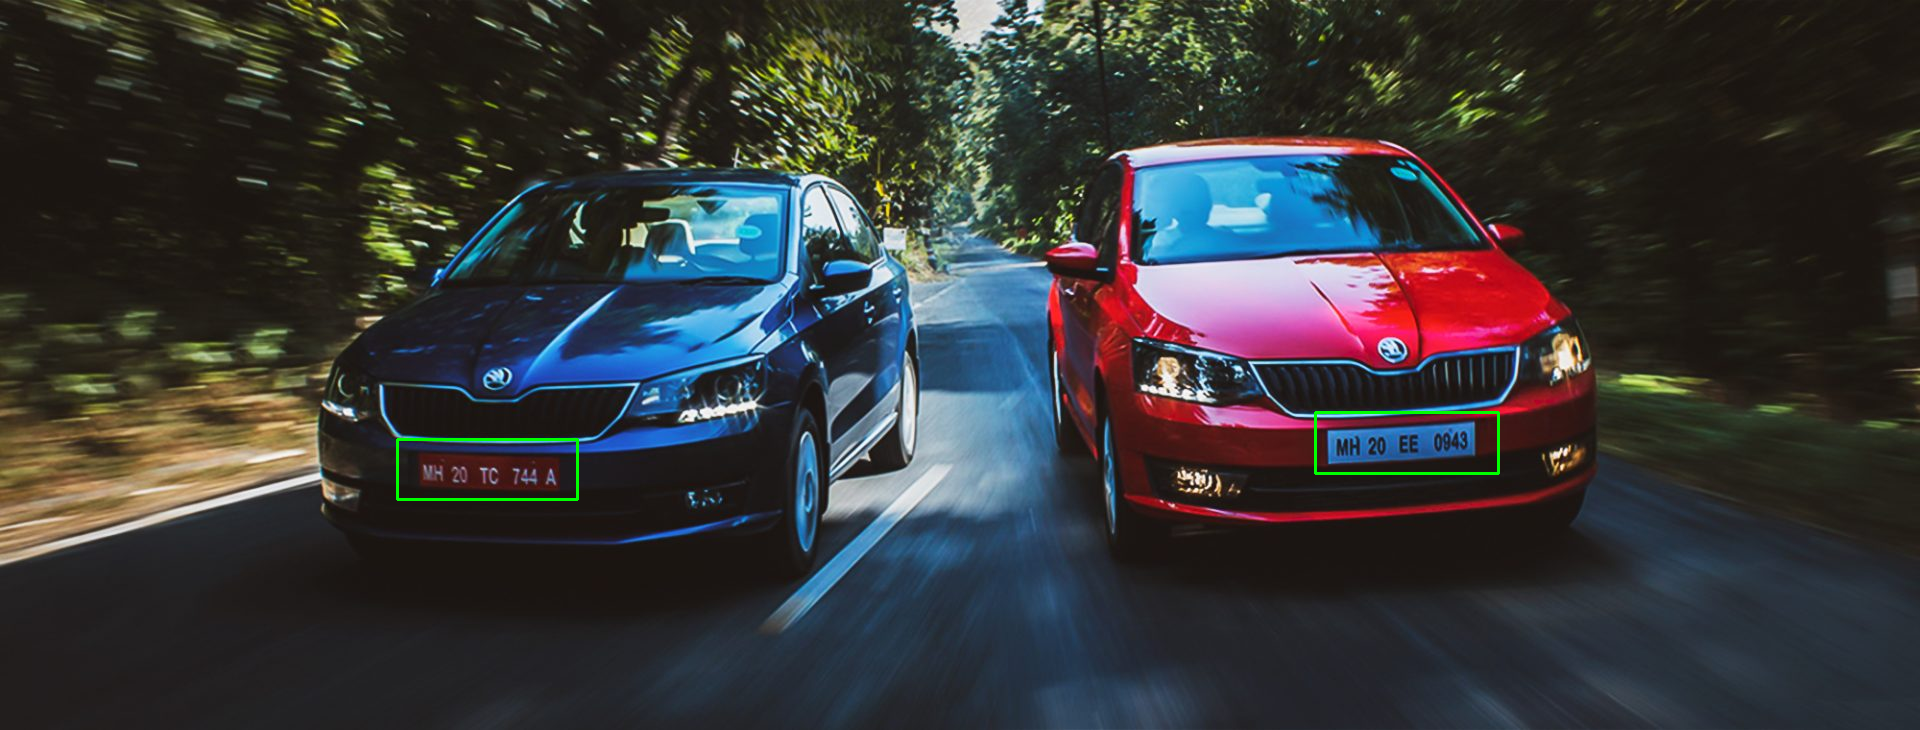

In [30]:
# Image 6 (Number plate detection)
img6=cv2.imread("/content/p6.jpg")
num_plate6=num_plate_model.detectMultiScale(img6,1.2,2)

for (x,y,w,h) in num_plate6:
  cv2.rectangle(img6,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img6)

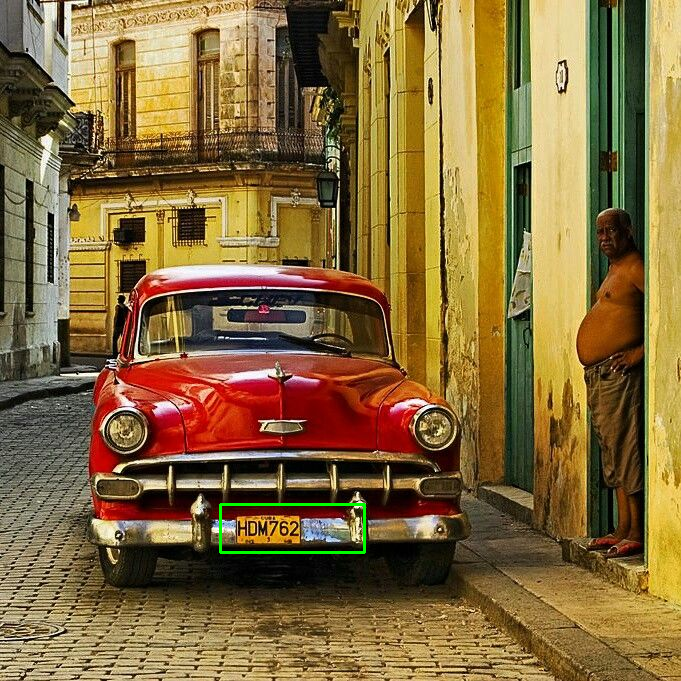

In [31]:
# Image 7 (Number plate detection)
img7=cv2.imread("/content/p7.jpg")
num_plate7=num_plate_model.detectMultiScale(img7,1.2,7)

for (x,y,w,h) in num_plate7:
  cv2.rectangle(img7,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img7)

In [32]:
# number plate detection was done using haarcascade algorithm and by changing the parameters (scaleFactor, minNeighbors) in detectMultiscale() funtion